<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item"><li><span><a href="#Jina-SparseNdArray" data-toc-modified-id="Jina-SparseNdArray-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Jina <code>SparseNdArray</code></a></span></li><li><span><a href="#Allow-document.embedding--with-sparse-data" data-toc-modified-id="Allow-document.embedding--with-sparse-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Allow <code>document.embedding</code>  with sparse data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#test--{'coo',-'bsr',-'csc',-'csr'}" data-toc-modified-id="test--{'coo',-'bsr',-'csc',-'csr'}-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>test  {'coo', 'bsr', 'csc', 'csr'}</a></span></li><li><span><a href="#Set-and-get-embeddings-from-scipy.sparse.coo_matrix" data-toc-modified-id="Set-and-get-embeddings-from-scipy.sparse.coo_matrix-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Set and get embeddings from scipy.sparse.coo_matrix</a></span></li><li><span><a href="#Set-and-get-embeddings-from-scipy.sparse.bsr_matrix" data-toc-modified-id="Set-and-get-embeddings-from-scipy.sparse.bsr_matrix-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Set and get embeddings from scipy.sparse.bsr_matrix</a></span></li><li><span><a href="#Set-and-get-embeddings-from-scipy.sparse.csr_matrix" data-toc-modified-id="Set-and-get-embeddings-from-scipy.sparse.csr_matrix-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Set and get embeddings from scipy.sparse.csr_matrix</a></span></li><li><span><a href="#Set-and-get-embeddings-from-scipy.sparse.csc_matrix" data-toc-modified-id="Set-and-get-embeddings-from-scipy.sparse.csc_matrix-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Set and get embeddings from scipy.sparse.csc_matrix</a></span></li></ul></li></ul></li><li><span><a href="#Allow-document.blob-with--sparse--data" data-toc-modified-id="Allow-document.blob-with--sparse--data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Allow <code>document.blob</code> with  sparse  data</a></span><ul class="toc-item"><li><span><a href="#Tensorflow-sparse-tests" data-toc-modified-id="Tensorflow-sparse-tests-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tensorflow sparse tests</a></span></li></ul></li><li><span><a href="#pytorch-sparse-arrays" data-toc-modified-id="pytorch-sparse-arrays-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>pytorch sparse arrays</a></span><ul class="toc-item"><li><span><a href="#Current-pytorch-test" data-toc-modified-id="Current-pytorch-test-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Current pytorch test</a></span></li><li><span><a href="#IMPORANT:" data-toc-modified-id="IMPORANT:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>IMPORANT:</a></span></li></ul></li></ul></div>

In [23]:
import numpy as np
a = np.array([True, False,True])
v = np.array([1,2,3])
v[a]

array([1, 3])

In [30]:
#np.where(a,v)

In [178]:
np.where(v<5)

(array([0, 1, 2]),)

### indexing time

In [240]:
sizes = np.linspace(1000,100_000, 10)

In [278]:
flags_times = []
indices_times = []
for s in sizes:
    s = int(s)
    x = np.random.rand(s, 100)
    print(f'Number elements = {s}')
    indices = np.random.choice(len(x), size= s//4, replace=False)
    
    # slicing using vector of booleans
    flag = np.zeros(len(x), dtype=bool)
    flag[indices]=True
    
    print('boolean flag:')
    t_flag = %timeit -o x[flag,:]

    # slicing using directly the coordinates
    print('vector of indices:')
    t_indices = %timeit -o x[indices,:]
    
    flags_times.append(t_flag.average)
    indices_times.append(t_indices.average)

Number elements = 1000
boolean flag:
16.6 µs ± 278 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
vector of indices:
12.5 µs ± 296 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Number elements = 12000
boolean flag:
339 µs ± 23.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
vector of indices:
271 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Number elements = 23000
boolean flag:
794 µs ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
vector of indices:
768 µs ± 58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Number elements = 34000
boolean flag:
2.27 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
vector of indices:
2.14 ms ± 39.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number elements = 45000
boolean flag:
2.87 ms ± 53 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
vector of indices:
3.23 ms ± 85.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops eac

<AxesSubplot:title={'center':'slicing with vector of booleans vs vector of indices'}, xlabel='Number of elements in the array', ylabel='time (ms)'>

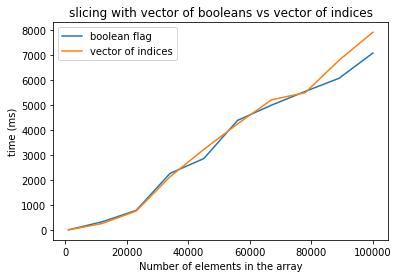

In [279]:
import pandas as pd
df = pd.DataFrame({'boolean flag': flags_times,
                   'vector of indices': indices_times})

df.index =sizes
df = df*10**6
df.plot(title='slicing with vector of booleans vs vector of indices', 
        xlabel='Number of elements in the array',
        ylabel='time (ms)')


In [92]:
indices = [0,2,25]

In [93]:
%timeit x[indices]

1.08 µs ± 67.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [94]:
flag = np.zeros(len(x), dtype=bool)
flag[0] = True
flag[2] = True
flag[25] = True

In [95]:
%timeit x[flag]

3.1 µs ± 230 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Selecting halve of the examples

In [155]:
indices = np.random.choice(len(x), size=5000, replace=False)
indices

array([7527, 2781, 2596, ..., 5507, 2130,  908])

In [156]:
flag = np.zeros(len(x), dtype=bool)
flag[indices]=True

In [157]:
flag.sum()

5000

In [158]:
# using an array containing the indices
%timeit x[indices]

6.95 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [159]:
# using an array of booleans
%timeit x[flag]

34.7 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [176]:
np.mean(x[indices] == x[indices])

1.0

In [173]:
flag = np.zeros(len(x),dtype=bool)

In [172]:
x[flag]

array([], dtype=float64)

In [167]:
np.random.choice(a=[False, True], size=len(x))

array([False, False,  True, ..., False,  True, False])

In [1]:
import scipy
from scipy import sparse

In [20]:
X_sp = scipy.sparse.rand(m=200_000,n=500, density=0.0001)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-4fd3070b34a6>", line 1, in <module>
    X_sp = scipy.sparse.rand(m=400_000,n=500, density=0.0001)
  File "/usr/local/lib/python3.9/site-packages/scipy/sparse/construct.py", line 860, in rand
    return random(m, n, density, format, dtype, random_state)
  File "/usr/local/lib/python3.9/site-packages/scipy/sparse/construct.py", line 806, in random
    ind = random_state.choice(mn, size=k, replace=False)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the 

TypeError: object of type 'NoneType' has no len()

In [12]:
import pickle

In [13]:
with open('X_sp.pkl', 'wb') as f:
    pickle.dump(obj=X_sp, file=f)

In [14]:
ls

PySparNN/           README.md           X_sp.pkl            sparse_tests.ipynb
PysparnnIndexer/    Untitled.ipynb      X_sp_npz.npz        tfidf_true_sparse/


In [15]:
with open('X_sp.pkl', 'rb') as f:
    X_sp_loaded=pickle.load(f)

In [16]:
X_sp_loaded

<100000x500 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in COOrdinate format>

In [17]:
!du X_sp.pkl

160	X_sp.pkl


In [18]:
scipy.sparse.save_npz('X_sp_npz', X_sp)

In [19]:
!du X_sp_npz.npz

120	X_sp_npz.npz


## Jina `SparseNdArray`

In [ ]:
%load_ext autoreload
%autoreload 2
import jina
from jina import Document
import scipy
from scipy import sparse
import scipy.sparse as sp
import numpy as np

In [ ]:
from jina.types.ndarray.sparse.tensorflow import SparseNdArray
SparseNdArray

In [ ]:
from jina.types.ndarray.sparse.scipy import SparseNdArray
SparseNdArray

## Allow `document.embedding`  with sparse data

In [ ]:
d = Document()
d.embedding = np.array([23,4])
d.embedding

In [ ]:
row  = np.array([0, 0, 1, 3, 1, 0, 0])
col  = np.array([0, 2, 1, 3, 1, 0, 0])
data = np.array([1, 1, 1, 1, 1, 1, 1])

X = sp.coo_matrix( (data,(row,col)), shape=(10,8))

In [ ]:
d = Document()
d.embedding = X

In [ ]:
scipy.sparse.issparse(X), type(X)

#### test  {'coo', 'bsr', 'csc', 'csr'}

#### Set and get embeddings from scipy.sparse.coo_matrix



In [ ]:
row  = np.array([0, 0, 1, 3, 1, 0, 0])
col  = np.array([0, 2, 1, 3, 1, 0, 0])
data = np.array([1, 1, 1, 1, 1, 1, 1])

X = sp.coo_matrix( (data,(row,col)), shape=(4,10))

d = Document()
d.embedding = X

isinstance(d.embedding, scipy.sparse.coo_matrix)

In [ ]:
np.testing.assert_array_equal(d.embedding.todense(), X.todense())

#### Set and get embeddings from scipy.sparse.bsr_matrix



In [ ]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3 ,4, 5, 6])

X = sp.bsr_matrix((data, (row, col)), shape=(3,10))

d = Document()
d.embedding = X

# this is false because sparse_parser in scipy.SparseNdArray
# casts the data as v = value.tocoo()
isinstance(d.embedding, scipy.sparse.bsr_matrix)
assert X.shape == d.embedding.shape

In [ ]:
X.tocoo()

In [ ]:
np.testing.assert_array_equal(d.embedding.todense(), X.todense())

#### Set and get embeddings from scipy.sparse.csr_matrix



In [ ]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3 ,4, 5, 6])

X = sp.csr_matrix((data, (row, col)), shape=(3,10))

d = Document()
d.embedding = X

# this is false because sparse_parser in scipy.SparseNdArray
# casts the data as v = value.tocoo()
print(isinstance(d.embedding, scipy.sparse.csr_matrix))
X.shape == d.embedding.shape

In [ ]:
np.testing.assert_array_equal(d.embedding.todense(), X.todense())

#### Set and get embeddings from scipy.sparse.csc_matrix



In [ ]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3 ,4, 5, 6])

X = sp.csc_matrix((data, (row, col)), shape=(3,10))

d = Document()
d.embedding = X

d.blob = X *2

# this is false because sparse_parser in scipy.SparseNdArray
# casts the data as v = value.tocoo()
isinstance(d.embedding, scipy.sparse.csr_matrix)
X.shape == d.embedding.shape

In [ ]:
np.testing.assert_array_equal(d.embedding.todense(), X.todense())

In [ ]:
np.testing.assert_array_equal(d.blob.todense(), 2*X.todense())

## Allow `document.blob` with  sparse  data

In [ ]:
import numpy as np

In [ ]:
row  = np.array([0, 0, 1, 3, 1, 0, 0])
col  = np.array([0, 2, 1, 3, 1, 0, 0])
data = np.array([1, 1, 1, 1, 1, 1, 1])

X = sp.coo_matrix( (data,(row,col)), shape=(4,10))

d = Document()
d.blob = X
d.embedding = X
isinstance(d.embedding, scipy.sparse.coo_matrix)
np.testing.assert_array_equal(d.blob.todense(), X.todense())

np.testing.assert_array_equal(d.blob.todense(), X.todense())
np.testing.assert_array_equal(d.embedding.todense(), X.todense())

In [ ]:
row  = np.array([0, 0, 1, 3, 1, 0, 0])
col  = np.array([0, 2, 1, 3, 1, 0, 0])
data = np.array([1, 1, 1, 1, 1, 1, 1])

X = sp.bsr_matrix( (data,(row,col)), shape=(4,10))

d = Document()
d.blob = X
isinstance(d.blob, scipy.sparse.coo_matrix)
np.testing.assert_array_equal(d.blob.todense(), X.todense())

In [ ]:
row  = np.array([0, 0, 1, 3, 1, 0, 0])
col  = np.array([0, 2, 1, 3, 1, 0, 0])
data = np.array([1, 1, 1, 1, 1, 1, 1])

X = sp.csc_matrix( (data,(row,col)), shape=(4,10))

d = Document()
d.blob = X
isinstance(d.blob, scipy.sparse.coo_matrix)
np.testing.assert_array_equal(d.blob.todense(), X.todense())

In [ ]:
row  = np.array([0, 0, 1, 3, 1, 0, 0])
col  = np.array([0, 2, 1, 3, 1, 0, 0])
data = np.array([1, 1, 1, 1, 1, 1, 1])

X = sp.csr_matrix( (data,(row,col)), shape=(4,10))

d = Document()
d.blob = X
isinstance(d.blob, scipy.sparse.coo_matrix)
np.testing.assert_array_equal(d.blob.todense(), X.todense())

In [ ]:
d.content

In [ ]:
d.blob

In [ ]:
d.embedding

In [ ]:
d.__dict__

In [ ]:
d._pb_body.embedding.sparse.dense_shape

In [ ]:
d.embedd

In [ ]:
d.blob = X

In [ ]:
d.blob

### Tensorflow sparse tests

In [ ]:
import tensorflow as tf

In [ ]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])

indices=[(x,y) for x,y in zip(row,col)]
X = tf.SparseTensor(indices=indices,
                        values=data,
                        dense_shape=[4, 10])

print(X.indices.numpy())
print('\n', X.values.numpy())
print('\n', tf.sparse.to_dense(X).numpy())

In [ ]:
import tensorflow as tf

row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
shape = [4, 10]

indices=[(x,y) for x,y in zip(row,col)]
X = tf.SparseTensor(indices=indices,
                    values=data,
                    dense_shape=shape)

d = Document()
d.embedding =  X
print(d.embedding)
#d.embedding
#d.blob =  X
#print('isinstance(d.embedding, sp.coo_matrix):', isinstance(d.embedding, sp.coo_matrix))
#print('isinstance(d.embedding, tf.SparseTensor):', isinstance(d.embedding, tf.SparseTensor))

In [ ]:
d.__dict__

## pytorch sparse arrays

In [ ]:
import torch
from torch.sparse import FloatTensor

In [ ]:
i = [[0, 1, 1],[2, 0, 2]]
v =  [[3, 4], [5, 6], [7, 8]]
s = torch.sparse_coo_tensor(i, v, (2, 3, 2))
s

In [ ]:
import torch
import jina
from jina import Document

row = [0, 0, 1, 2, 2, 2]
col = [0, 2, 2, 0, 1, 2]
data = [1, 2, 3, 4, 5, 6]
shape = [4, 10]
indices= [list(row), list(col)]

X = torch.sparse_coo_tensor(indices, data, shape)
#X.to_dense()
d = Document()
d.embedding = X
#d.blob = X
#d.embedding == None
#print(d.embedding)

In [ ]:
#d.embedding 

In [ ]:
jina.__version__

In [ ]:
d.embedding

In [ ]:
d.blob

In [ ]:
type(d.embedding)

In [ ]:
# there is no embedding saved
d.embedding ==None

Nevertheless, if we use the tests...

In [ ]:
idx_shape = ([[0, 1, 2]], [3])
transpose=False
i = torch.LongTensor(idx_shape[0])
v = torch.FloatTensor([3, 4, 5])
X2 = torch.sparse.FloatTensor(i.t() if transpose else i, v, torch.Size(idx_shape[1]))
X2

d = Document()
d.embedding = X2
d.blob = X2

In [ ]:
d.embedding

In [ ]:
d.__dict__

In [ ]:
aux = torch.sparse_coo_tensor(
            indices=indices,
            values=data,
            size=shape)

In [ ]:
type(aux)

In [ ]:
?X

In [ ]:
b = SparseNdArray()
#b.value = a
#np.testing.assert_equal(b.value.to_dense().numpy(), a.to_dense().numpy())
b.blob = X
b.embedding = X
type(b)

In [ ]:
b.embedding

In [ ]:
b.blob

In [ ]:
X.to_dense().numpy()

### Current pytorch test

CURRENT TESTS DO NOT TEST DOCUMENTS CONTAINING sparse torch arrays

They only test SparseNdArray types



```python
@pytest.mark.parametrize(
    'idx_shape',
    [
        ([[0, 1, 2]], [3]),
        ([[0, 2, 1], [1, 0, 2]], [3, 3]),
        ([[0, 1, 1], [0, 1, 2], [2, 1, 2]], [3, 3, 3]),
    ],
)
def test_torch_sparse(idx_shape, transpose=False):
    from jina.types.ndarray.sparse.pytorch import SparseNdArray
    import torch

    i = torch.LongTensor(idx_shape[0])
    v = torch.FloatTensor([3, 4, 5])
    a = torch.sparse.FloatTensor(i, v, torch.Size(idx_shape[1]))

    b = SparseNdArray(transpose_indices=transpose)
    b.value = a
    np.testing.assert_equal(b.value.to_dense().numpy(), a.to_dense().numpy())
```

In [ ]:
from jina.types.ndarray.sparse.pytorch import SparseNdArray
import torch

idx_shape = ([[0, 1, 2]], [3])
transpose=False
i = torch.LongTensor(idx_shape[0])
v = torch.FloatTensor([3, 4, 5])
X = torch.sparse.FloatTensor(i.t() if transpose else i, v, torch.Size(idx_shape[1]))
X

In [ ]:
X.to_dense()

In [ ]:
idx_shape = ([[0, 2, 1], [1, 0, 2]], [3, 3])
transpose=False
i = torch.LongTensor(idx_shape[0])
v = torch.FloatTensor([3, 4, 5])
X = torch.sparse.FloatTensor(i.t() if transpose else i, v, torch.Size(idx_shape[1]))
X

In [ ]:
X.to_dense()

In [ ]:
idx_shape = ([[0, 1, 1], [0, 1, 2], [2, 1, 2]], [3, 3, 3])
transpose=False
i = torch.LongTensor(idx_shape[0])
v = torch.FloatTensor([3, 4, 5])
X = torch.sparse.FloatTensor(i.t() if transpose else i, v, torch.Size(idx_shape[1]))
X

In [ ]:
X.to_dense()

### IMPORANT:

Note that `SparseNdArray` can get `blob` and `embedding` without being converted to None

In [ ]:

b = SparseNdArray()
b.blob = a
b.embedding = a

In [ ]:
b.blob

In [ ]:
b.embedding